# Suavização Exponencial Simples e Amortecida
Prof. Fernando Amaral

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime

In [2]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [3]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [4]:
data.index.freq = 'MS'
# smoothing_trend (beta) 80% de influência na tendência mais atual
fit1 = Holt(data).fit(smoothing_level=0.2, smoothing_trend=0.8, optimized=False)
fcast1 = fit1.forecast(12)

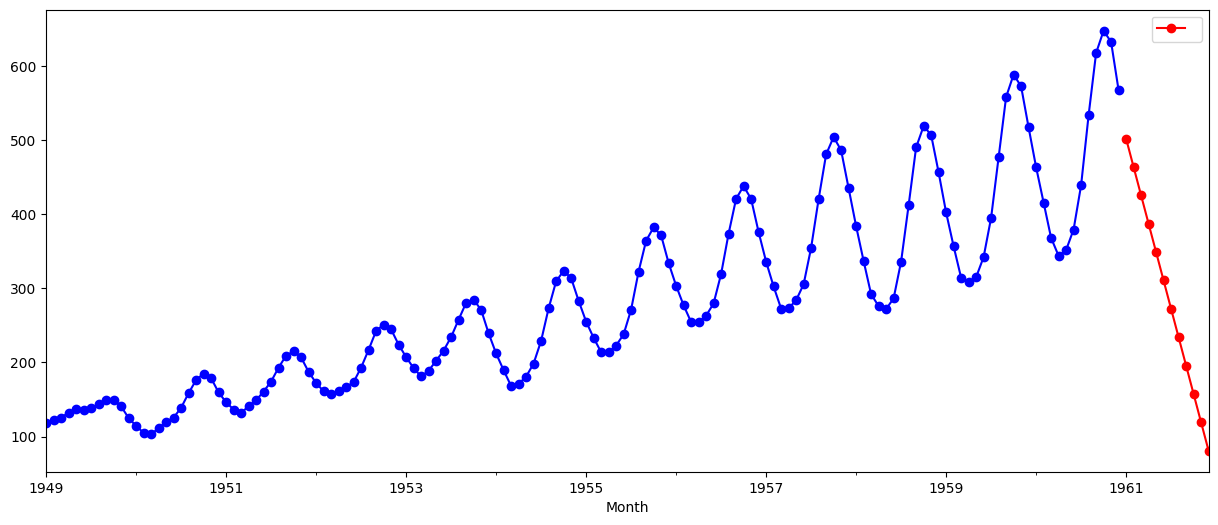

In [5]:
fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='red', marker="o", legend=True)
plt.show()

In [6]:
data.index.freq = 'MS'
# suavização da tendência phi
fit3 = Holt(data, damped_trend=True).fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast3 = fit3.forecast(12)

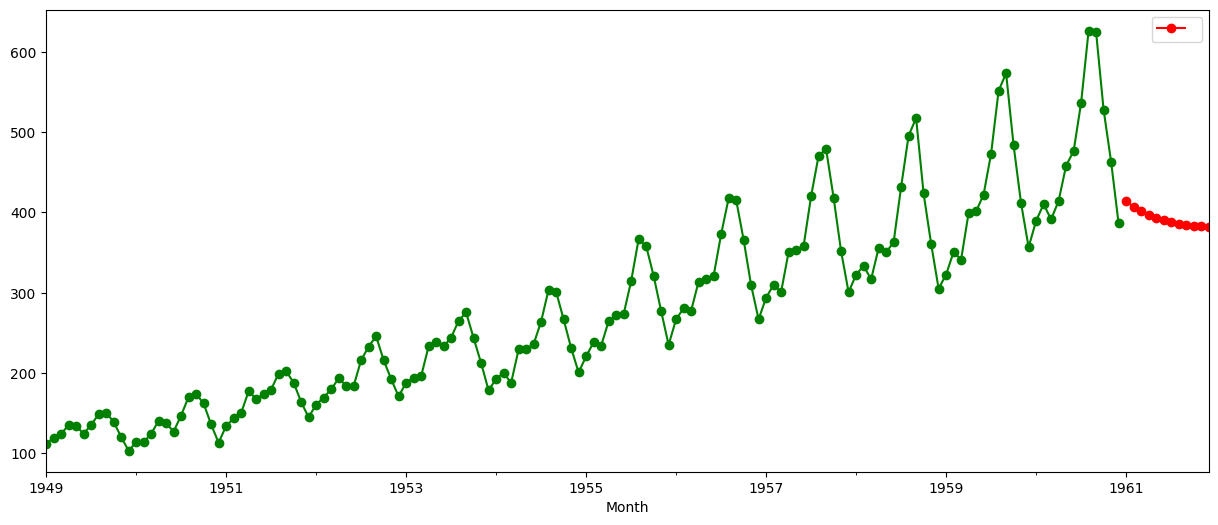

In [7]:
fit3.fittedvalues.plot(marker="o", color='green')
fcast3.plot(color='red', marker="o", legend=True)
plt.show()